In [1]:
using Interact, Plots, DifferentialEquations

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/68e8625414ebad7fa3600be04107fbeb27e26809-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/68e8625414ebad7fa3600be04107fbeb27e26809-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
gr()

Plots.GRBackend()

In [3]:
function f(t)
    f = cos(2.0*pi*t) + 0.1*rand(1)[1];
end

f (generic function with 1 method)

In [4]:
# manually calculate diffeq
function manual_soln(min, max, step)
    #timestep
    delta_t = step
    max_t = max
    t = min
    nstep_t = max_t/delta_t
    x_init = 0

    #create time step array
    time = collect(t:delta_t:max_t)
    #empty array for X(t) values
    xArray = Float64[]
    push!(xArray, 0) #adds X(0) value to xArray


    #Euler method (efficient)
    let inner_t = t, x = x_init # let deals with for loop scope in julia
        for n = 1:nstep_t
            #increment t by 0.1
            inner_t += delta_t

            #find X'(t) and add it to drvArray
            drv = f(inner_t)

            #find X(t) and add it to xArray
            x += drv * delta_t
            push!(xArray, x)
        end
    end
    manualPlotArray = [time, xArray]
end

man_plot = manual_soln(0.0, 10, 0.1);

In [5]:
# using DifferentialEquations package to calculate diffeq
f(u, p, t) = cos(2*pi*t)
function diffeq(min, max)
    u0 = min
    tspan = (min, max)
    prob = ODEProblem(f, u0, tspan)
    soln_diffeq = solve(prob)
    return soln_diffeq
end

diffeq_plot = diffeq(0.0, 10.0);

In [6]:
# Calculating diffeq analytically
function analytical_soln(max, step)
    solns_analytical = Float64[]
    steps = collect(0:step:max)
    for step in steps
        x = ((sin(2*pi*step)/(2*pi)))
        push!(solns_analytical, x)
    end
    return solns_analytical
end

analytical_plot = analytical_soln(10.0, 0.1);

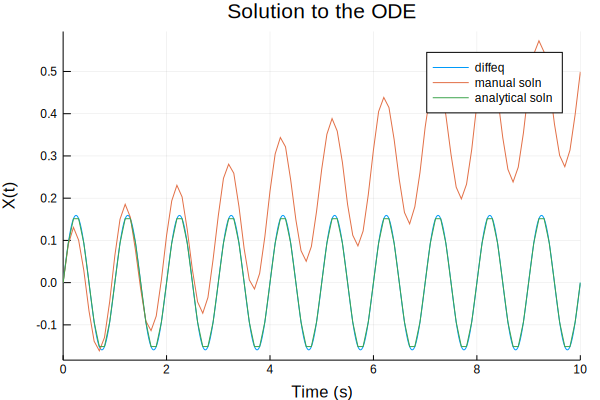

In [7]:
plot(diffeq_plot,linewidth=1,title="Solution to the ODE",
      xaxis="Time (s)",yaxis="X(t)", label="diffeq")
plot!(man_plot[1], man_plot[2], linewidth = 1, label="manual soln")
plot!(man_plot[1], analytical_plot, linewidth = 1, label = "analytical soln")

In [ ]:
@manipulate for t = 1:0.1:10
    p_man = manual_plot(t,0.1);
    p_diffeq = diffeq(0, t);
    p_analytical = analytical_soln(t, 0.1);
    plot(p_man[1],p_man[2],lw=2,label="Manual solution")
    plot!(p_diffeq, lw=2, label = "Diffeq package solution")
    plot!(p_man[1], p_analytical, lw=2, label = "Analytical solution")
end